In [1]:
#Importing libraries
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from pandas import read_csv
#Load the csv file as dataframe
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = read_csv('./dataset/housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
# #Splitting data into training and test set before data exploratory analysis
# X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.20, random_state=42)

# Data exploratory analysis

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


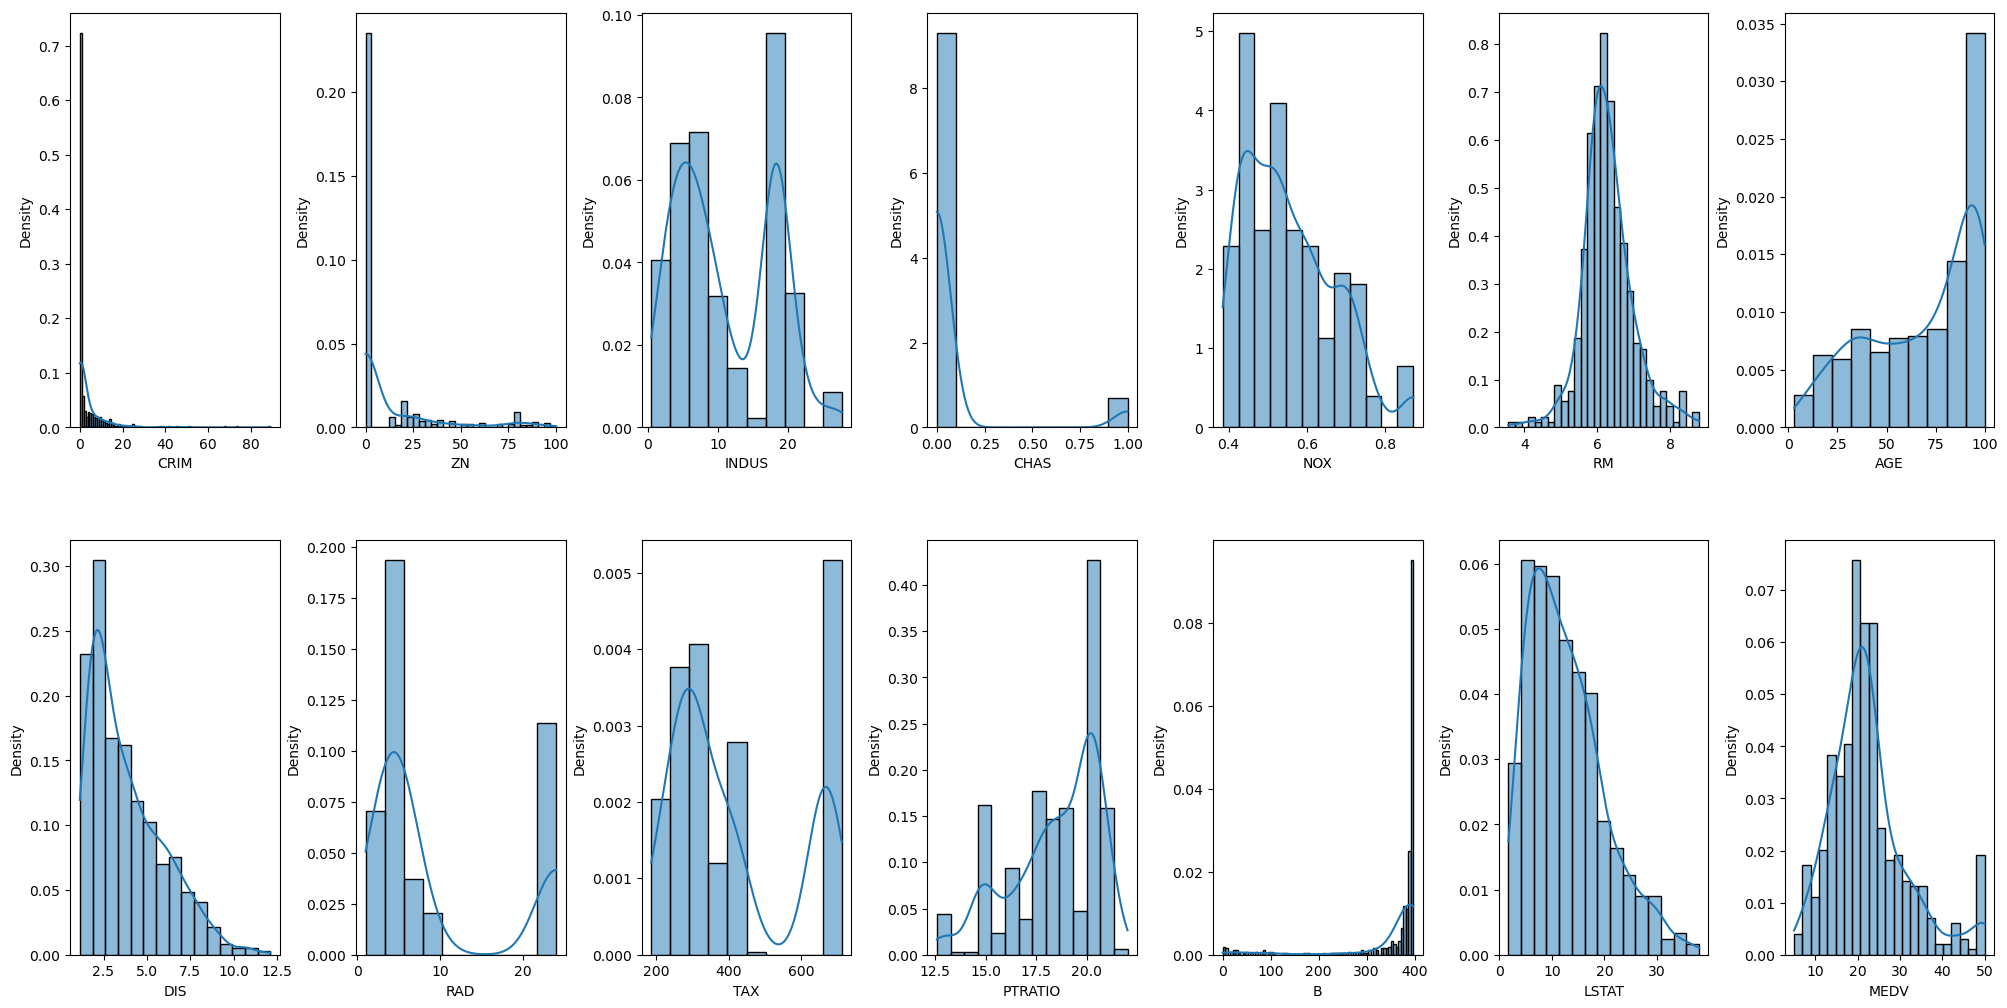

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
fig, axs = plt.subplots(2, 7, figsize=(20, 10))
index = 0
axs = axs.flatten()
for column in df:
    sns.histplot(df[column], linewidth=1,ax=axs[index], kde=True, stat = "density")
    index +=1 
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

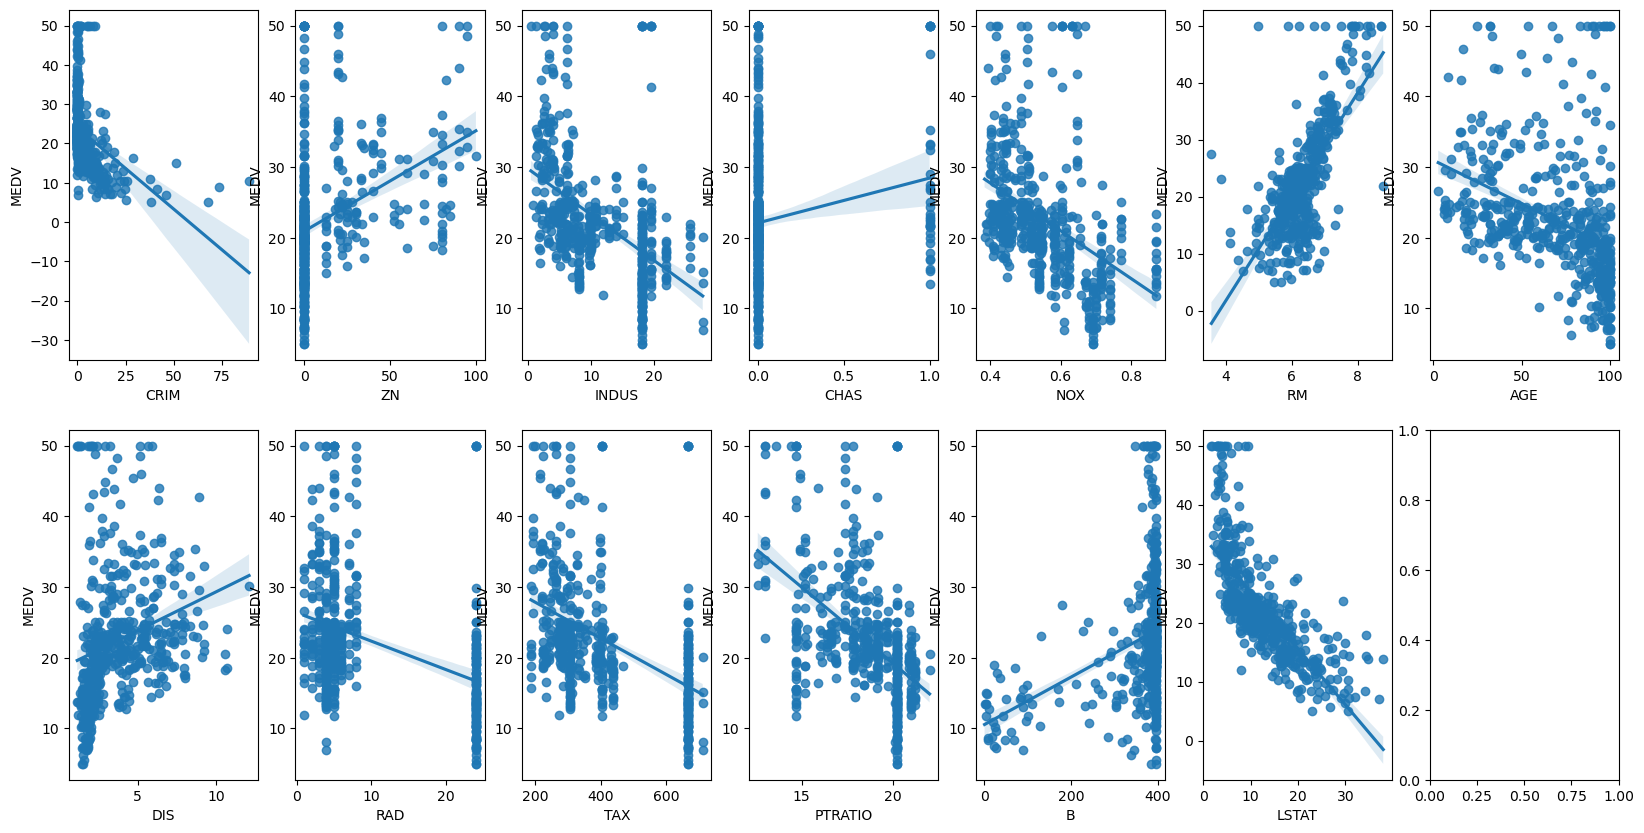

In [83]:
# to make plotting easier we will remove our target variable price from the main dataframe and save it on a separate one:
target = df.MEDV
df_independent = df.drop(columns=['MEDV'])
fig, axs = plt.subplots(2, 7, figsize=(20, 10))
index = 0
axs = axs.flatten()
# we use a for loop to plot our independent variables against our dependent one:
for col in df_independent:
    sns.regplot(x=df_independent[col], y=target, ax=axs[index],data=df_independent, label=col)
    index += 1


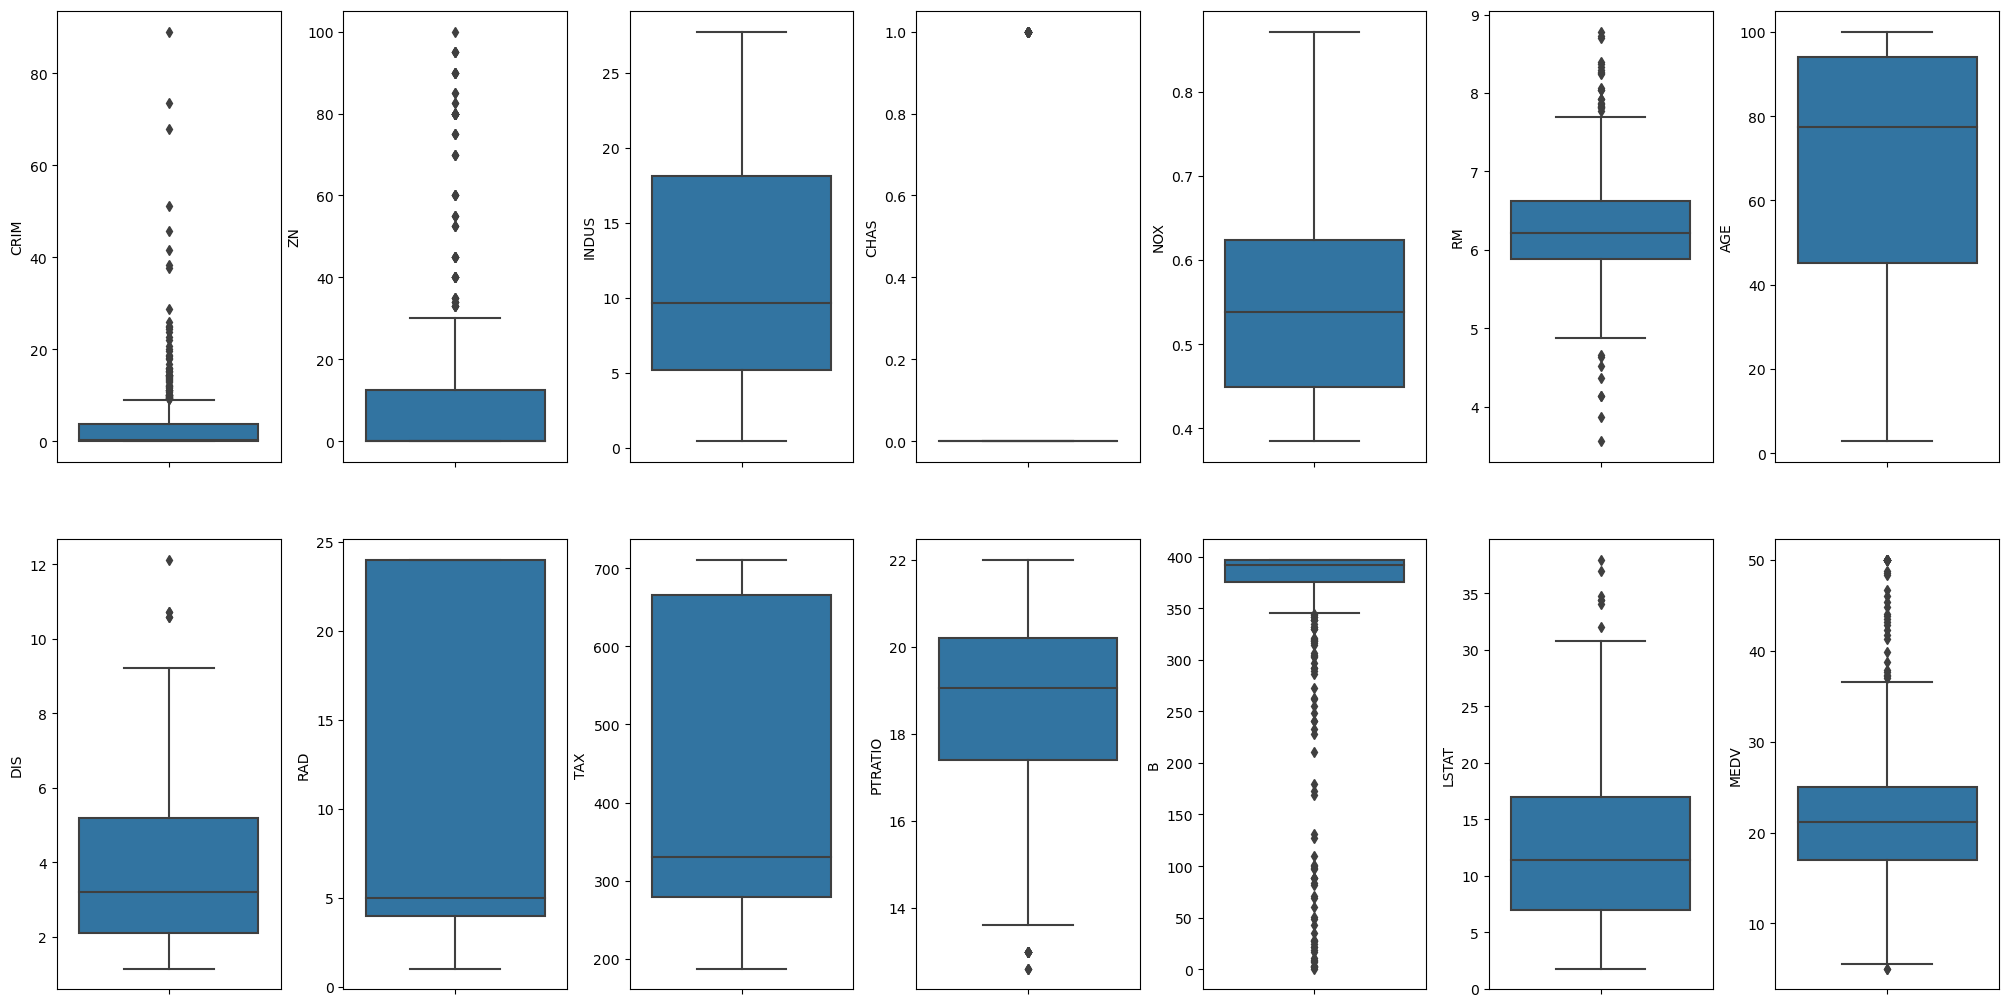

In [58]:
fig, axs = plt.subplots(2, 7, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

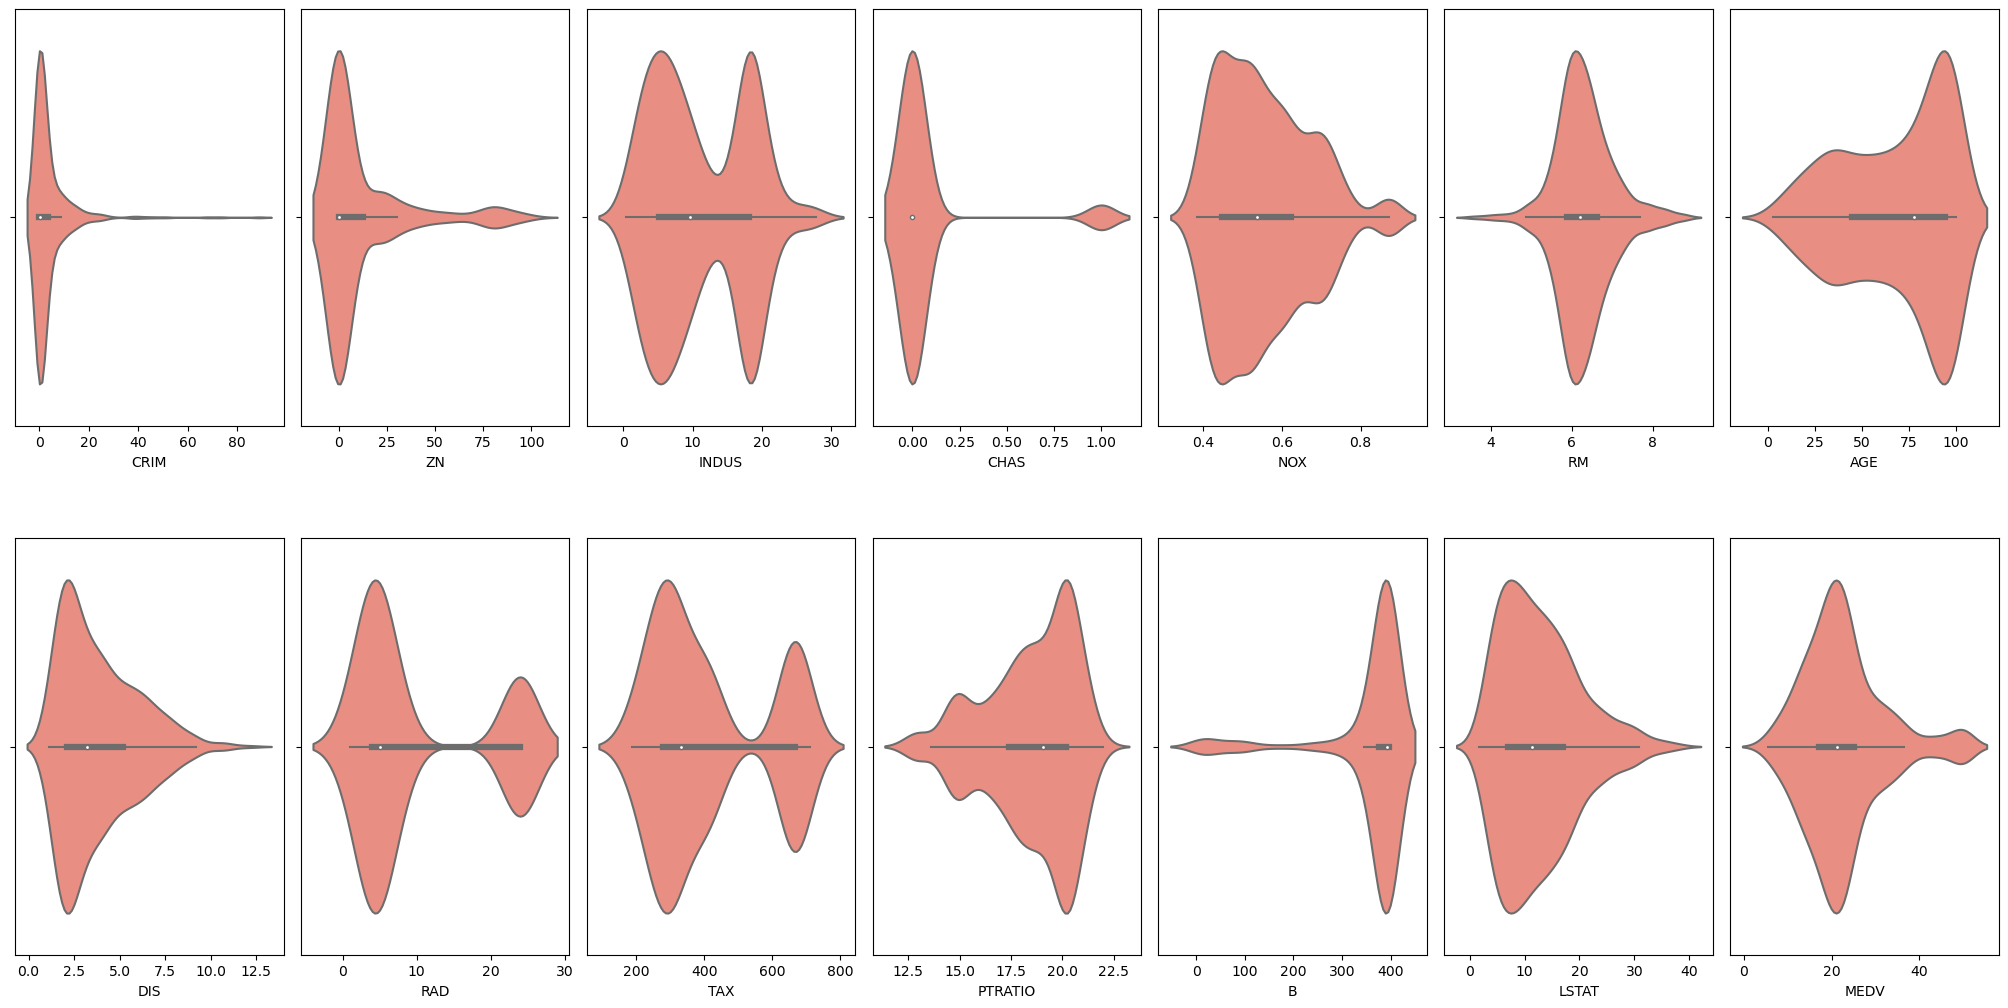

In [59]:
fig, axs = plt.subplots(2, 7, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.violinplot(x=k, ax=axs[index], data=df, color='salmon', whis=3)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

C:\Users\Jelly\AppData\Local\Temp\ipykernel_31516\2417468493.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


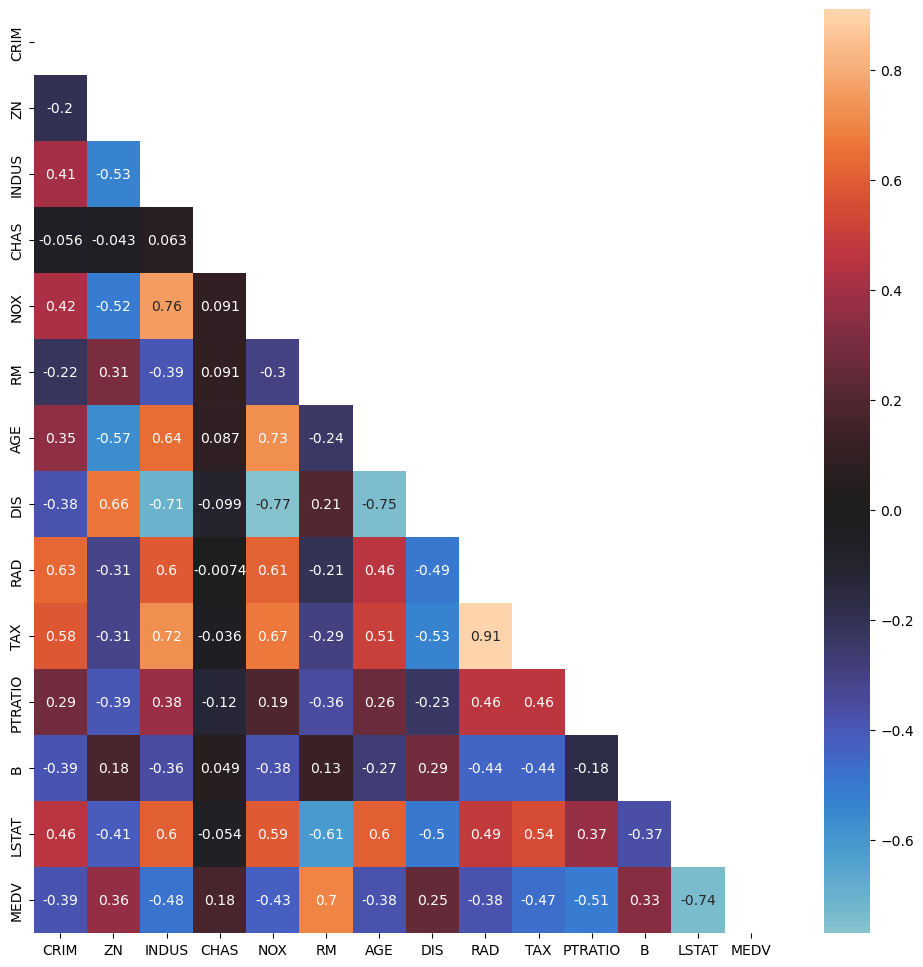

In [60]:
# save correlations to variable
corr = df.corr()
# we can create a mask to not show duplicate values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# generate heatmap
plt.figure(figsize= (12,12))
sns.heatmap(corr, annot=True, center=0, mask=mask)
plt.show()

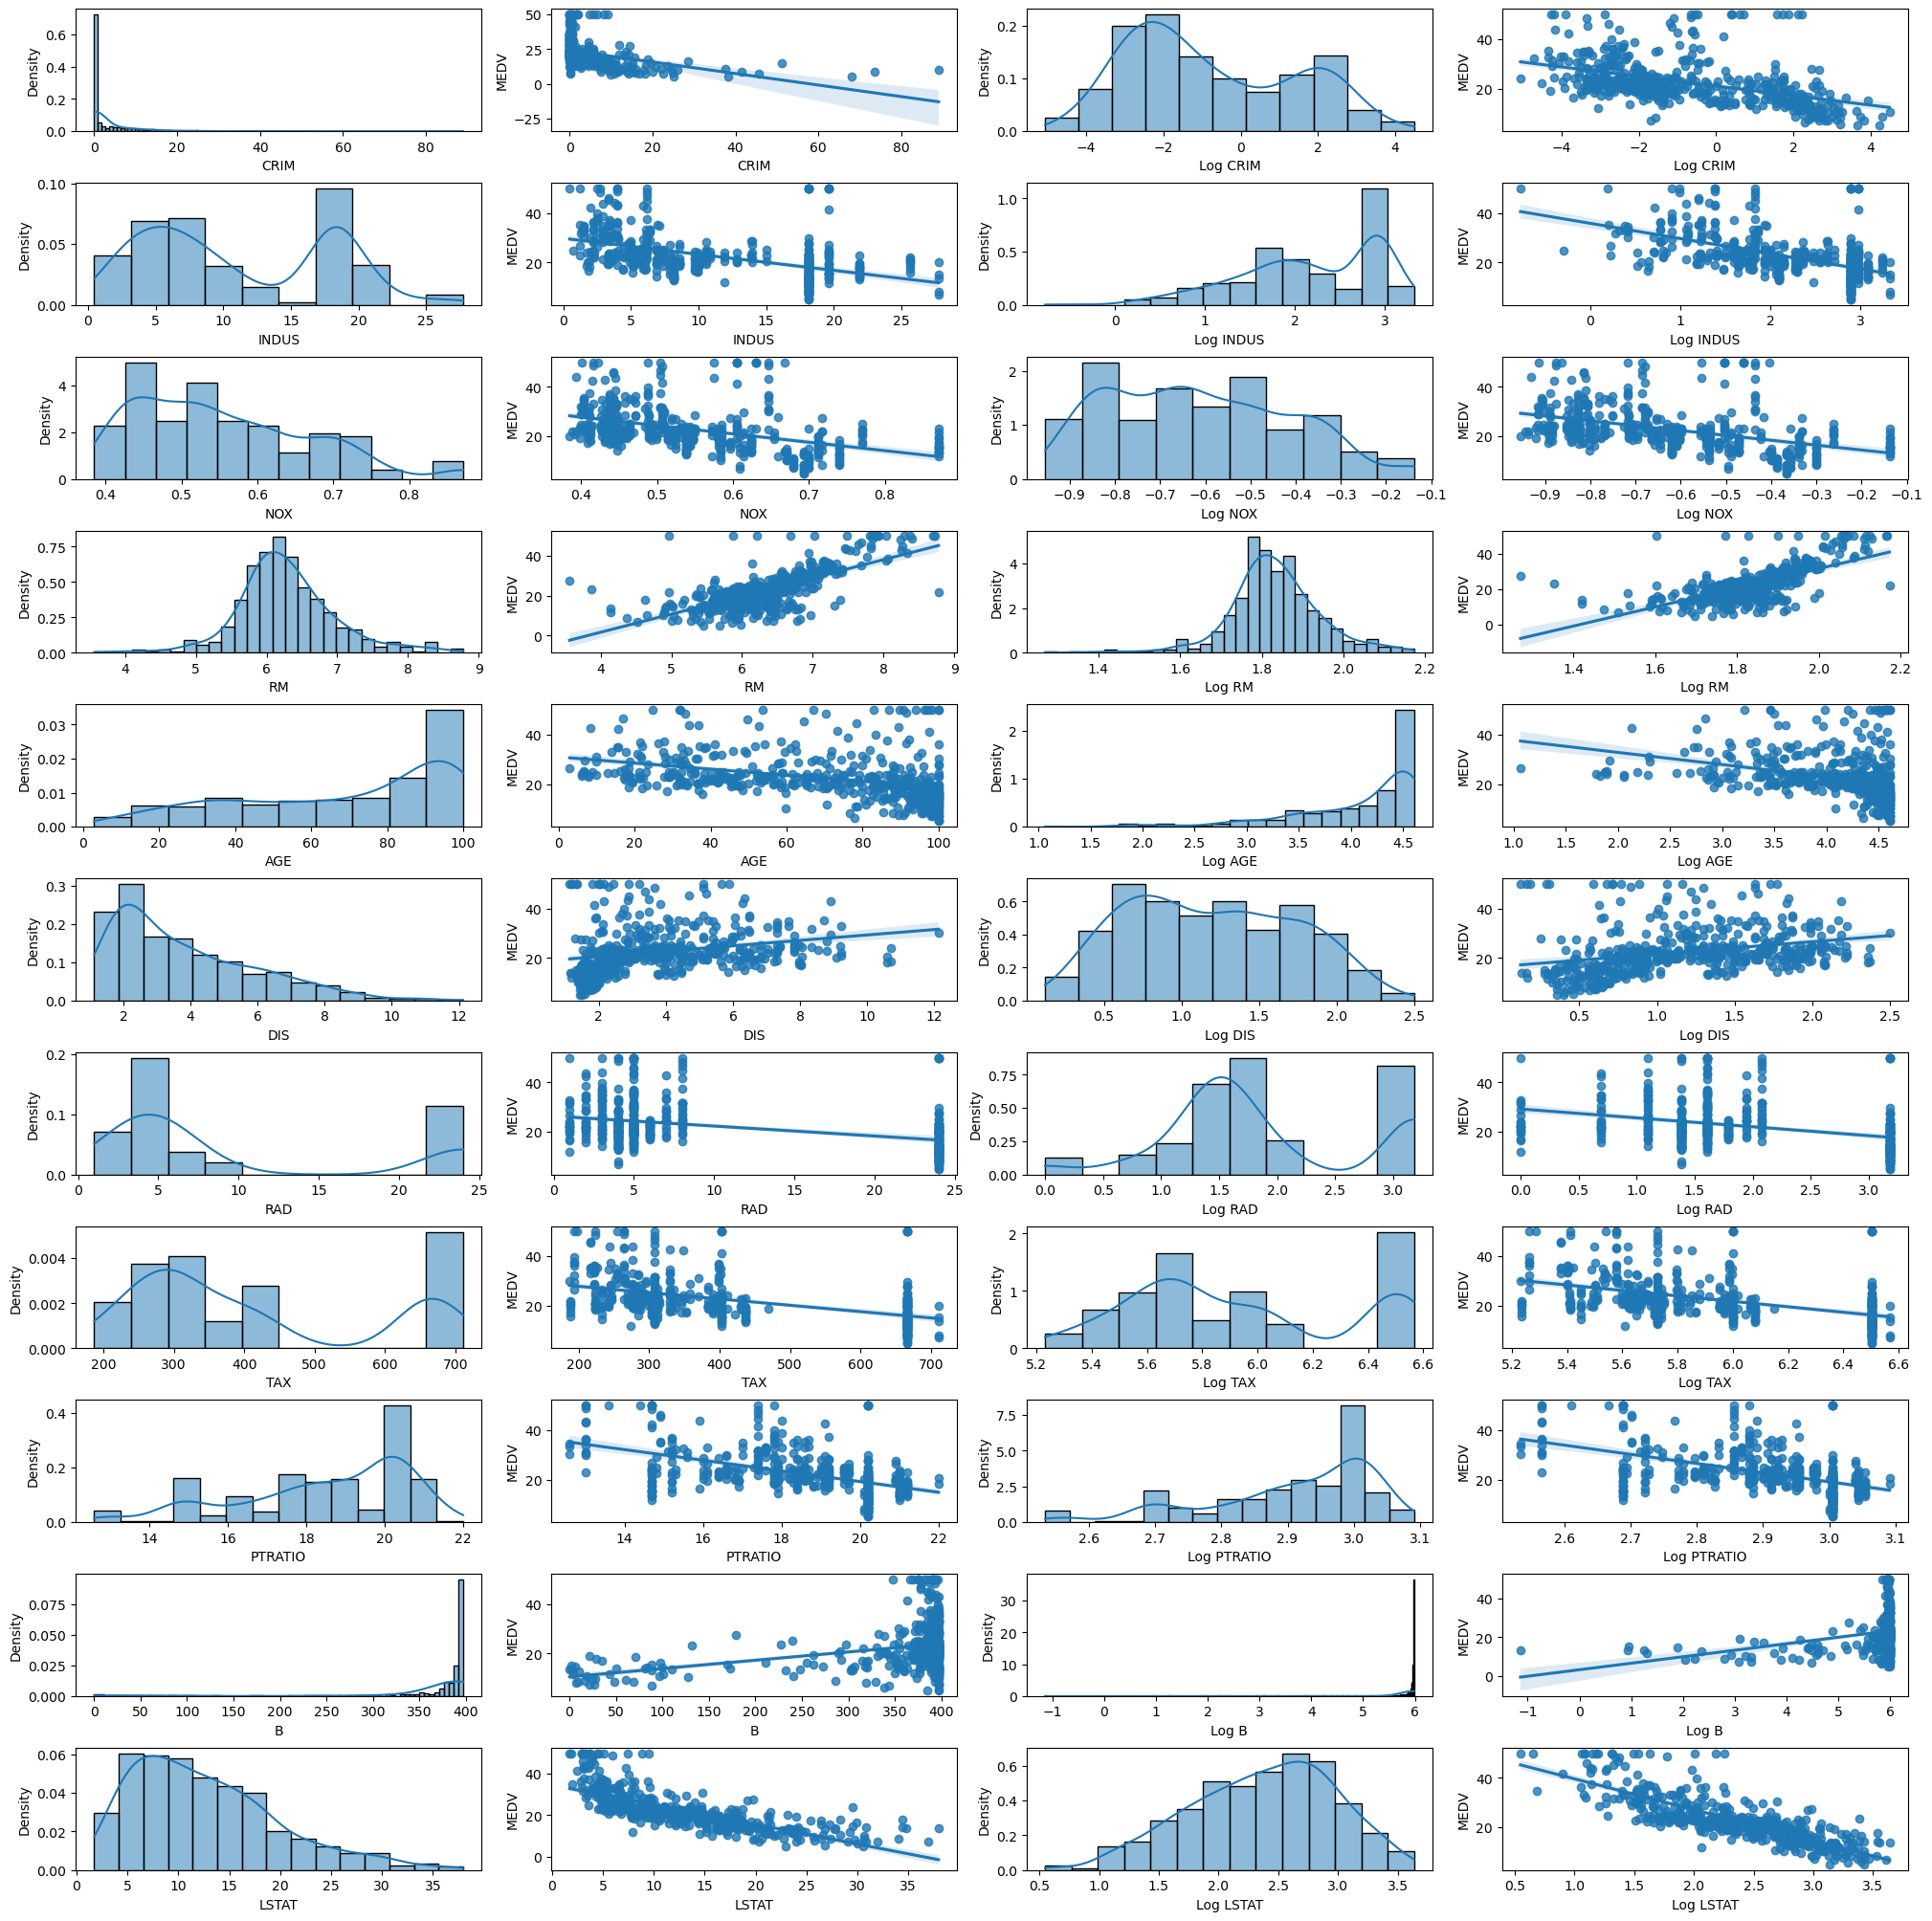

In [61]:
%matplotlib inline
import numpy as np
fig, axs = plt.subplots(11, 4, figsize=(20, 20))
index = 0
axs = axs.flatten()
df_continuous = df_independent.drop(columns=['CHAS', 'ZN'])
for column in df_continuous:
    sns.histplot(df_continuous[column], linewidth=1,ax=axs[index], kde=True, stat = "density")
    index +=1
    sns.regplot(x=df_continuous[column], y=target, label="CRIM", ax = axs[index])
    index +=1
    sns.histplot(np.log(df_continuous[column]), linewidth=1,ax=axs[index], kde=True, stat = "density")
    ax=axs[index]
    ax.set(xlabel="Log " +column)
    index +=1
    sns.regplot(x=np.log(df_continuous[column]), y=target,ax=axs[index], label="CRIM")
    ax=axs[index]
    ax.set(xlabel="Log "+column)
    index +=1
plt.tight_layout(pad=0.4)

# Preprocessing

In [53]:
cols_to_transform = ["CRIM", "NOX", "RAD", "DIS", "TAX","LSTAT"]

In [84]:
y =  target
df_train = df_independent

for col in cols_to_transform:
    df_train[col] = np.log1p(df[col])

In [169]:
df_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006300,18.0,2.31,0,0.430483,6.575,65.2,1.627278,0.693147,5.693732,15.3,396.90,1.788421
1,0.026944,0.0,7.07,0,0.384582,6.421,78.9,1.786261,1.098612,5.493061,17.8,396.90,2.316488
2,0.026924,0.0,7.07,0,0.384582,7.185,61.1,1.786261,1.098612,5.493061,17.8,392.83,1.615420
3,0.031857,0.0,2.18,0,0.377066,6.998,45.8,1.954757,1.386294,5.407172,18.7,394.63,1.371181
4,0.066770,0.0,2.18,0,0.377066,7.147,54.2,1.954757,1.386294,5.407172,18.7,396.90,1.845300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.060747,0.0,11.93,0,0.452985,6.593,69.1,1.246630,0.693147,5.613128,21.0,391.99,2.367436
502,0.044275,0.0,11.93,0,0.452985,6.120,76.7,1.190127,0.693147,5.613128,21.0,396.90,2.310553
503,0.058986,0.0,11.93,0,0.452985,6.976,91.0,1.152943,0.693147,5.613128,21.0,396.90,1.893112
504,0.103991,0.0,11.93,0,0.452985,6.794,89.3,1.220505,0.693147,5.613128,21.0,393.45,2.012233


# Hyperparameter tuning

In [258]:
from sklearn.model_selection import train_test_split
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector

X_train, X_test, y_train, y_test = train_test_split(df_train,y, test_size = 0.2, random_state = 3)

In [291]:
#GridCV
from sklearn.model_selection import GridSearchCV

lasso_params = [{'alpha': np.arange(0.01, 2.0, 0.01)}]

las = linear_model.Lasso()
las_gs = GridSearchCV(las, lasso_params, cv = 5, scoring='r2')
las_gs.fit(X_train, y_train)
print(las_gs.best_params_)

{'alpha': 0.01}


In [292]:
xgb_params = [{'max_depth': [3, 7, 9],
    'learning_rate': [0.001, 0.01, 0.1, 1.0],
    'subsample': [0.5, 0.7, 1],
     'n_estimators':[10, 50, 100, 500]}]

xgb = XGBRegressor()
xgb_gs = GridSearchCV(xgb, xgb_params, cv = 5, scoring='r2')
xgb_gs.fit(X_train, y_train)
print(xgb_gs.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}


In [297]:
gbr_params = [{ 'alpha' : [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2.0],
    'max_depth': [3, 7, 9],
    'learning_rate': [0.001, 0.01, 0.1, 1.0],
    'subsample': [0.5, 0.7, 1],
     'n_estimators':[10, 50, 100, 500]}]
gbr = GradientBoostingRegressor()
gbr_gs = GridSearchCV(xgb, gbr_params, cv = 5, scoring='r2')
gbr_gs.fit(X_train, y_train)
print(gbr_gs.best_params_)

{'alpha': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}


In [283]:
stats.uniform(0.5, 0.5)

# Feature Selection

In [250]:
forward_feature_selection =  SequentialFeatureSelector(RandomForestRegressor(), n_features_to_select='auto', direction="forward", scoring = "r2", cv = 5)
forward_feature_selection.fit(X_train, y_train)

SequentialFeatureSelector(estimator=RandomForestRegressor(),
                          n_features_to_select='auto', scoring='r2')

In [251]:
selected_features = []
selected_features_bool = forward_feature_selection.get_support()
for i in range(len(column_names[:-1])):
    if selected_features_bool[i] ==True:
        selected_features.append(column_names[i])


In [252]:
df_forward_feature = X_train[selected_features] 
df_forward_feature.head()

,CRIM,NOX,RM,DIS,PTRATIO,LSTAT
454,2.352673,0.538246,6.728,1.251648,20.2,2.981126
471,1.617091,0.426574,6.229,1.410816,20.2,2.629728
281,0.036380,0.366655,6.968,1.831733,14.9,1.720979
477,2.774050,0.478716,5.304,1.131628,20.2,3.254629
107,0.123252,0.418710,6.127,1.138602,20.9,2.714032


In [281]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle = True, random_state = 54)

lm_cv_res=[[],[],[],[]]
gbr_cv_res = [[],[],[],[]]
las_cv_res = [[],[],[],[]]
xgb_cv_res = [[],[],[],[]]
for train_index, test_index in kf.split(df_forward_feature):
    X_train_ffs = df_forward_feature.loc[df_forward_feature.index[train_index]]
    y_train_ffs = target.loc[df_forward_feature.index[train_index]]
    X_val_ffs = df_forward_feature.loc[df_forward_feature.index[test_index]]
    y_val_ffs = target.loc[df_forward_feature.index[test_index]]
    lm = LinearRegression()

# Train the model using the training sets 
    lm.fit(X_train_ffs, y_train_ffs)
    y_test_pred_lm = lm.predict(X_val_ffs)
    acc_lm = metrics.r2_score(y_val_ffs, y_test_pred_lm)
    lm_cv_res[0].append(acc_lm)
    lm_cv_res[1].append(metrics.mean_absolute_error(y_val_ffs, y_test_pred_lm))
    lm_cv_res[2].append(metrics.mean_squared_error(y_val_ffs, y_test_pred_lm))
    lm_cv_res[3].append(np.sqrt(metrics.mean_squared_error(y_val_ffs, y_test_pred_lm)))
    
    gbr = GradientBoostingRegressor(, random_state=30)
    gbr.fit(X_train_ffs, y_train_ffs)
    y_test_pred_gbr = gbr.predict(X_val_ffs)
    acc_gbr = metrics.r2_score(y_val_ffs, y_test_pred_gbr)
    gbr_cv_res[0].append(acc_gbr)
    gbr_cv_res[1].append(metrics.mean_absolute_error(y_val_ffs, y_test_pred_gbr))
    gbr_cv_res[2].append(metrics.mean_squared_error(y_val_ffs, y_test_pred_gbr))
    gbr_cv_res[3].append(np.sqrt(metrics.mean_squared_error(y_val_ffs, y_test_pred_gbr)))
    
    las = linear_model.Lasso(alpha=0.01)
    las.fit(X_train_ffs, y_train_ffs)
    y_test_pred_lasso = las.predict(X_val_ffs)
    acc_las = metrics.r2_score(y_val_ffs, y_test_pred_lasso)
    las_cv_res[0].append(acc_las)
    las_cv_res[1].append(metrics.mean_absolute_error(y_val_ffs, y_test_pred_lasso))
    las_cv_res[2].append(metrics.mean_squared_error(y_val_ffs, y_test_pred_lasso))
    las_cv_res[3].append(np.sqrt(metrics.mean_squared_error(y_val_ffs, y_test_pred_lasso)))
    
    xgb = XGBRegressor()
    xgb.fit(X_train_ffs, y_train_ffs)
    y_test_pred_xgb = xgb.predict(X_val_ffs)
    acc_xgb = metrics.r2_score(y_val_ffs, y_test_pred_xgb)
    xgb_cv_res[0].append(acc_xgb)
    xgb_cv_res[1].append(metrics.mean_absolute_error(y_val_ffs, y_test_pred_xgb))
    xgb_cv_res[2].append(metrics.mean_squared_error(y_val_ffs, y_test_pred_xgb))
    xgb_cv_res[3].append(np.sqrt(metrics.mean_squared_error(y_val_ffs, y_test_pred_xgb)))
print("LR")
print("R2:" +str(np.mean(lm_cv_res[0])) + " MAE:" +str(np.mean(lm_cv_res[1]))+" MSE:" + str(np.mean(lm_cv_res[2]))+ " RMSE:" +str(np.mean(lm_cv_res[3])))
print("GBR")
print("R2:" +str(np.mean(gbr_cv_res[0])) + " MAE:" +str(np.mean(gbr_cv_res[1]))+" MSE:" + str(np.mean(gbr_cv_res[2]))+ " RMSE:" +str(np.mean(gbr_cv_res[3])))
print("LASSO")
print("R2:" +str(np.mean(las_cv_res[0])) + " MAE:" +str(np.mean(las_cv_res[1]))+" MSE:" + str(np.mean(las_cv_res[2]))+ " RMSE:" +str(np.mean(las_cv_res[3])))
print("XGB")
print("R2:" +str(np.mean(xgb_cv_res[0])) + " MAE:" +str(np.mean(xgb_cv_res[1]))+" MSE:" + str(np.mean(xgb_cv_res[2]))+ " RMSE:" +str(np.mean(xgb_cv_res[3])))

LR
R2:0.7253734144308727 MAE:3.395858901514887 MSE:22.70881399563789 RMSE:4.699235048186161
GBR
R2:0.8262571630898392 MAE:2.6589676059031113 MSE:14.105555033520067 RMSE:3.692241869926473
LASSO
R2:0.7241028716328266 MAE:3.400310460569461 MSE:22.843139284690494 RMSE:4.711474802771634
XGB
R2:0.7964930119111024 MAE:2.6822677961907733 MSE:16.658755338720137 RMSE:3.9351332376188237


In [254]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector

backward_feature_selection =  SequentialFeatureSelector(RandomForestRegressor(), n_features_to_select='auto', direction="backward", scoring = "r2", cv = 5)
backward_feature_selection.fit(X_train, y_train)
selected_features = []
selected_features_bool = backward_feature_selection.get_support()
for i in range(len(column_names[:-1])):
    if selected_features_bool[i] ==True:
        selected_features.append(column_names[i])
df_backward_feature = X_train[selected_features] 
df_backward_feature.head()

,ZN,NOX,RM,DIS,TAX,PTRATIO,LSTAT
454,0.0,0.538246,6.728,1.251648,6.502790,20.2,2.981126
471,0.0,0.426574,6.229,1.410816,6.502790,20.2,2.629728
281,20.0,0.366655,6.968,1.831733,5.379897,14.9,1.720979
477,0.0,0.478716,5.304,1.131628,6.502790,20.2,3.254629
107,0.0,0.418710,6.127,1.138602,5.953243,20.9,2.714032


In [303]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle = True, random_state = 54)

lm_cv_res=[[],[],[],[]]
gbr_cv_res = [[],[],[],[]]
las_cv_res = [[],[],[],[]]
for train_index, test_index in kf.split(df_backward_feature):
    X_train_ffs = df_backward_feature.loc[df_backward_feature.index[train_index]]
    y_train_ffs = target.loc[df_forward_feature.index[train_index]]
    X_val_ffs = df_backward_feature.loc[df_backward_feature.index[test_index]]
    y_val_ffs = target.loc[df_backward_feature.index[test_index]]
    lm = LinearRegression()

# Train the model using the training sets 
    lm.fit(X_train_ffs, y_train_ffs)
    y_test_pred_lm = lm.predict(X_val_ffs)
    acc_lm = metrics.r2_score(y_val_ffs, y_test_pred_lm)
    lm_cv_res[0].append(acc_lm)
    lm_cv_res[1].append(metrics.mean_absolute_error(y_val_ffs, y_test_pred_lm))
    lm_cv_res[2].append(metrics.mean_squared_error(y_val_ffs, y_test_pred_lm))
    lm_cv_res[3].append(np.sqrt(metrics.mean_squared_error(y_val_ffs, y_test_pred_lm)))
    
    gbr = GradientBoostingRegressor(alpha=0.5,learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample = 0.5, random_state=30)
    gbr.fit(X_train_ffs, y_train_ffs)
    y_test_pred_gbr = gbr.predict(X_val_ffs)
    acc_gbr = metrics.r2_score(y_val_ffs, y_test_pred_gbr)
    gbr_cv_res[0].append(acc_gbr)
    gbr_cv_res[1].append(metrics.mean_absolute_error(y_val_ffs, y_test_pred_gbr))
    gbr_cv_res[2].append(metrics.mean_squared_error(y_val_ffs, y_test_pred_gbr))
    gbr_cv_res[3].append(np.sqrt(metrics.mean_squared_error(y_val_ffs, y_test_pred_gbr)))
    
    las = linear_model.Lasso(alpha=0.1)
    las.fit(X_train_ffs, y_train_ffs)
    y_test_pred_lasso = las.predict(X_val_ffs)
    acc_las = metrics.r2_score(y_val_ffs, y_test_pred_lasso)
    las_cv_res[0].append(acc_las)
    las_cv_res[1].append(metrics.mean_absolute_error(y_val_ffs, y_test_pred_lasso))
    las_cv_res[2].append(metrics.mean_squared_error(y_val_ffs, y_test_pred_lasso))
    las_cv_res[3].append(np.sqrt(metrics.mean_squared_error(y_val_ffs, y_test_pred_lasso)))
    
    xgb = XGBRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 500, subsample = 0.5)
    xgb.fit(X_train_ffs, y_train_ffs)
    y_test_pred_xgb = xgb.predict(X_val_ffs)
    acc_xgb = metrics.r2_score(y_val_ffs, y_test_pred_xgb)
    xgb_cv_res[0].append(acc_xgb)
    xgb_cv_res[1].append(metrics.mean_absolute_error(y_val_ffs, y_test_pred_xgb))
    xgb_cv_res[2].append(metrics.mean_squared_error(y_val_ffs, y_test_pred_xgb))
    xgb_cv_res[3].append(np.sqrt(metrics.mean_squared_error(y_val_ffs, y_test_pred_xgb)))
print("LR")
print("R2:" +str(np.mean(lm_cv_res[0])) + " MAE:" +str(np.mean(lm_cv_res[1]))+" MSE:" + str(np.mean(lm_cv_res[2]))+ " RMSE:" +str(np.mean(lm_cv_res[3])))
print("GBR")
print("R2:" +str(np.mean(gbr_cv_res[0])) + " MAE:" +str(np.mean(gbr_cv_res[1]))+" MSE:" + str(np.mean(gbr_cv_res[2]))+ " RMSE:" +str(np.mean(gbr_cv_res[3])))
print("LASSO")
print("R2:" +str(np.mean(las_cv_res[0])) + " MAE:" +str(np.mean(las_cv_res[1]))+" MSE:" + str(np.mean(las_cv_res[2]))+ " RMSE:" +str(np.mean(las_cv_res[3])))
print("XGB")
print("R2:" +str(np.mean(xgb_cv_res[0])) + " MAE:" +str(np.mean(xgb_cv_res[1]))+" MSE:" + str(np.mean(xgb_cv_res[2]))+ " RMSE:" +str(np.mean(xgb_cv_res[3])))

LR
R2:0.7238826212335463 MAE:3.3791986601039268 MSE:22.814600927352185 RMSE:4.708325445214095
GBR
R2:0.8485136487539078 MAE:2.4048821248683097 MSE:12.20711816921899 RMSE:3.4361999219595196
LASSO
R2:0.7104692609257854 MAE:3.4604644317684388 MSE:24.014400735782118 RMSE:4.8256065082895665
XGB
R2:0.8485118355446589 MAE:2.4045473012542056 MSE:12.485672566703212 RMSE:3.4588357309815794


In [301]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle = True, random_state = 54)

lm_cv_res=[[],[],[],[]]
gbr_cv_res = [[],[],[],[]]
las_cv_res = [[],[],[],[]]
for train_index, test_index in kf.split(X_train):
    X_train_no_fs = X_train.loc[X_train.index[train_index]]
    y_train_no_fs = target.loc[X_train.index[train_index]]
    X_val = X_train.loc[X_train.index[test_index]]
    y_val = target.loc[X_train.index[test_index]]
    lm = LinearRegression()

# Train the model using the training sets 
    lm.fit(X_train_no_fs, y_train_no_fs)
    y_test_pred_lm = lm.predict(X_val)
    acc_lm = metrics.r2_score(y_val, y_test_pred_lm)
    lm_cv_res[0].append(acc_lm)
    lm_cv_res[1].append(metrics.mean_absolute_error(y_val, y_test_pred_lm))
    lm_cv_res[2].append(metrics.mean_squared_error(y_val, y_test_pred_lm))
    lm_cv_res[3].append(np.sqrt(metrics.mean_squared_error(y_val, y_test_pred_lm)))
    
    gbr = GradientBoostingRegressor(alpha=0.5,learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample = 0.5, random_state=30)
    gbr.fit(X_train_no_fs, y_train_no_fs)
    y_test_pred_gbr = gbr.predict(X_val)
    acc_gbr = metrics.r2_score(y_val, y_test_pred_gbr)
    gbr_cv_res[0].append(acc_gbr)
    gbr_cv_res[1].append(metrics.mean_absolute_error(y_val, y_test_pred_gbr))
    gbr_cv_res[2].append(metrics.mean_squared_error(y_val, y_test_pred_gbr))
    gbr_cv_res[3].append(np.sqrt(metrics.mean_squared_error(y_val, y_test_pred_gbr)))
    
    las = linear_model.Lasso(alpha=0.1)
    las.fit(X_train_no_fs, y_train_no_fs)
    y_test_pred_lasso = las.predict(X_val)
    acc_las = metrics.r2_score(y_val, y_test_pred_lasso)
    las_cv_res[0].append(acc_las)
    las_cv_res[1].append(metrics.mean_absolute_error(y_val, y_test_pred_lasso))
    las_cv_res[2].append(metrics.mean_squared_error(y_val, y_test_pred_lasso))
    las_cv_res[3].append(np.sqrt(metrics.mean_squared_error(y_val, y_test_pred_lasso)))
    
    xgb = XGBRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 500, subsample = 0.5)
    xgb.fit(X_train_no_fs, y_train_no_fs)
    y_test_pred_xgb = xgb.predict(X_val)
    acc_xgb = metrics.r2_score(y_val, y_test_pred_xgb)
    xgb_cv_res[0].append(acc_xgb)
    xgb_cv_res[1].append(metrics.mean_absolute_error(y_val, y_test_pred_xgb))
    xgb_cv_res[2].append(metrics.mean_squared_error(y_val, y_test_pred_xgb))
    xgb_cv_res[3].append(np.sqrt(metrics.mean_squared_error(y_val, y_test_pred_xgb)))
    
print("LR")
print("R2:" +str(np.mean(lm_cv_res[0])) + " MAE:" +str(np.mean(lm_cv_res[1]))+" MSE:" + str(np.mean(lm_cv_res[2]))+ " RMSE:" +str(np.mean(lm_cv_res[3])))
print("GBR")
print("R2:" +str(np.mean(gbr_cv_res[0])) + " MAE:" +str(np.mean(gbr_cv_res[1]))+" MSE:" + str(np.mean(gbr_cv_res[2]))+ " RMSE:" +str(np.mean(gbr_cv_res[3])))
print("LASSO")
print("R2:" +str(np.mean(las_cv_res[0])) + " MAE:" +str(np.mean(las_cv_res[1]))+" MSE:" + str(np.mean(las_cv_res[2]))+ " RMSE:" +str(np.mean(las_cv_res[3])))
print("XGB")
print("R2:" +str(np.mean(xgb_cv_res[0])) + " MAE:" +str(np.mean(xgb_cv_res[1]))+" MSE:" + str(np.mean(xgb_cv_res[2]))+ " RMSE:" +str(np.mean(xgb_cv_res[3])))

LR
R2:0.74219662080915 MAE:3.3473632947398038 MSE:21.40501488806418 RMSE:4.547581410204478
GBR
R2:0.865523113632684 MAE:2.287372634412328 MSE:10.995805450173162 RMSE:3.2540524534063158
LASSO
R2:0.7187360890722303 MAE:3.366002497845826 MSE:23.433441153654577 RMSE:4.752358611834587
XGB
R2:0.8411969568394962 MAE:2.450879453880031 MSE:13.136342481366823 RMSE:3.5336337653389647


# Model Training and Testing

In [306]:
gbr = GradientBoostingRegressor(alpha=0.5,learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample = 0.5, random_state=30)
gbr.fit(X_train, y_train)
y_test_pred_gbr = gbr.predict(X_test)
acc_gbr = metrics.r2_score(y_test, y_test_pred_gbr)
print("R2: " +str(acc_gbr))
print("MAE: " + str(metrics.mean_absolute_error(y_test, y_test_pred_gbr)))
print("MSE: " + str(metrics.mean_squared_error(y_test, y_test_pred_gbr)))
print("RMSE: " + str(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_gbr))))

R2: 0.9065558210953996
MAE: 1.909704614112124
MSE: 7.73295461304656
RMSE: 2.7808190543518934
